# Lecture 6.3

# Sales Prediction

Source = https://www.kaggle.com/datasets/ashydv/advertising-dataset

**Problem Statement**

Build a model predicting sales based on money spent on different marketing platforms

## Performing Simple Linear Regression

Equation: y = c + $m_{1}$$x_{1}$ + $m_{2}$$x_{2}$ + $m_{n}$$x_{n}$

- y is the respnose
- c is the intercept
- $m_{1}$ is the coefficient for the first feature
- $m_{n}$ is the coefficient for the nth feature

In our case: y = c + $m_{1}$ X TV

The m values are called the model **coefficients** or **model parameters**

Mainly there are 7 assuptions taken while using Linear Regression
- Linear Model
- No Multicolinearity in the data
- Homoscendasticity of Residuals or Equal Variances
- No Autocorrelation in residuals
- Number of obeservations Greater than the number of predictors
- Each observation is unique
- Predictors are distrubuted normally

Resource: https://www.geeksforgeeks.org/assumptions-of-linear-regression/

In [1]:
!pip3 install seaborn

In [2]:
# Dataset Handling
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Data Visualization
import matplotlib.pyplot as plot
import seaborn as sns

# Model Training
from sklearn.linear_model import LinearRegression

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression

np.set_printoptions(suppress=True)

# 1. Reading the data

In [3]:
file_name = '/Users/christopherreid/My Drive (christopherreid@arizona.edu)/Classes/6. Summer 2023/CSC 380 - Principles of Data Science/Lectures/Jupyter Notebooks/advertising.csv'
advertising = pd.DataFrame(pd.read_csv(file_name))
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
advertising.shape

(200, 4)

In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# 2. Data Cleaning

In [7]:
advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# 3. Exploratory Data Analysis

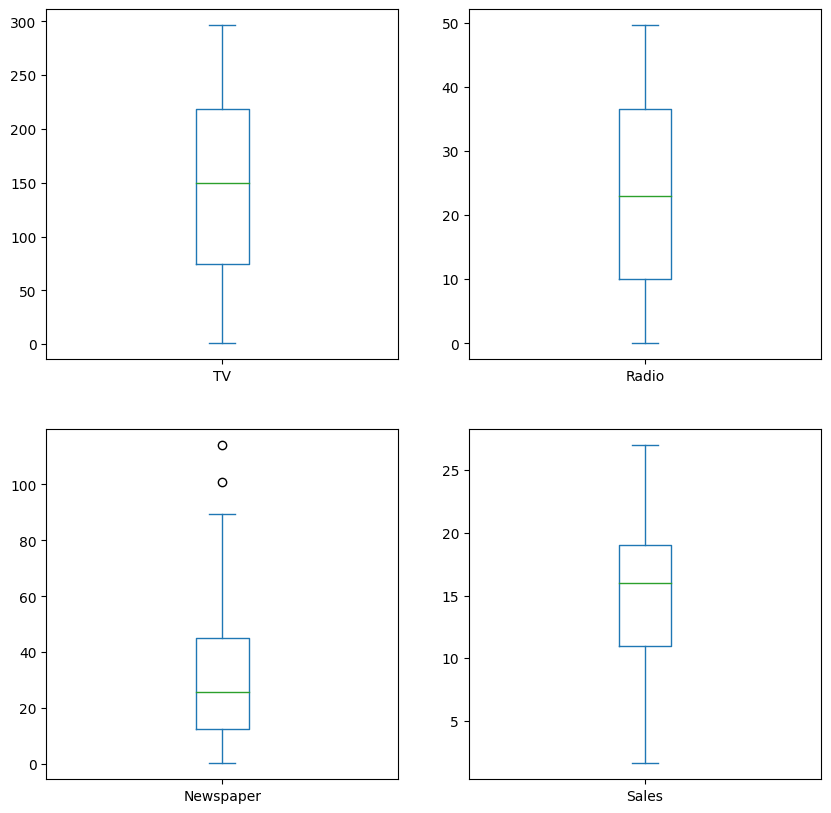

In [8]:
# Using Box Plot
# Cirlces represent outliers which skew data

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

advertising['TV'].plot.box(ax=axes[0,0])
advertising['Radio'].plot.box(ax=axes[0,1])
advertising['Newspaper'].plot.box(ax=axes[1,0])
advertising['Sales'].plot.box(ax=axes[1,1])
plt.show()

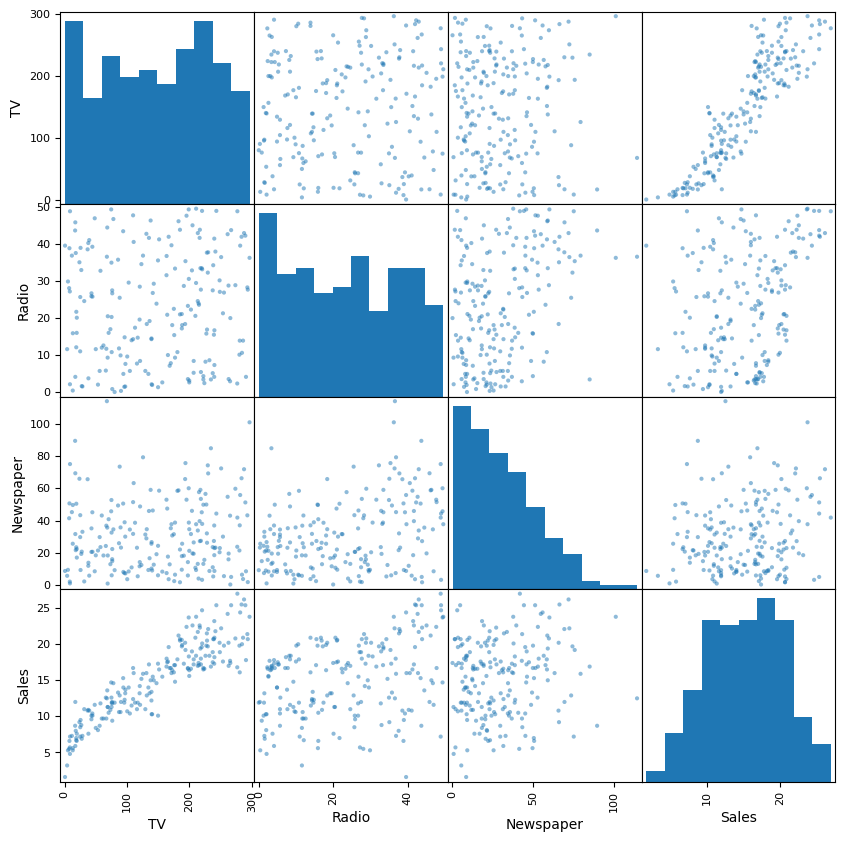

In [9]:
g = pd.plotting.scatter_matrix(advertising, figsize=(10,10))
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

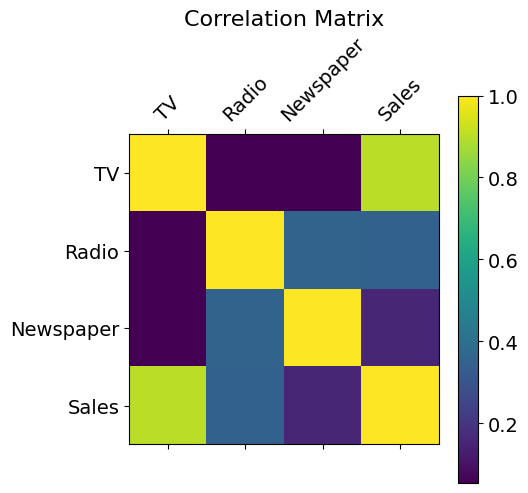

In [10]:
f = plt.figure(figsize = (5,5))
plt.matshow(advertising.corr(), fignum=f.number, )
plot.xticks(range(advertising.select_dtypes(['number']).shape[1]), advertising.select_dtypes(['number']).columns, fontsize =14, rotation=45)
plot.yticks(range(advertising.select_dtypes(['number']).shape[1]), advertising.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 14)
plt.title('Correlation Matrix', fontsize=16)

In [11]:
f_stats, p_values = f_regression(advertising[['TV', 'Radio', 'Newspaper']].to_numpy(),advertising['Sales'].to_numpy())
f_stats, p_values

(array([856.17671282,  27.57467815,   5.0667947 ]),
 array([0.        , 0.00000039, 0.02548744]))

## Model Building

### Data Preparation

First assign the feature variable, **TV**, in this case, to the variable **X** and the response variable **Sales** to the variable **Y**

In [42]:
X = advertising['TV'].to_numpy()
Y = advertising['Sales'].to_numpy()

### Train-Val-Test Split

Split our variable into trainig and testing sets. You'll perfrom this by importing **train_test_split** from the **sklearn.model_selection** library. It is good practice to keep **70%** of the data in the **train** dataset and the remaining **30%** in the **test** dataset.

In [37]:
X_train, X_test_and_val, y_train, y_test_and_val = train_test_split(X, Y, train_size = 0.7,random_state = 100)
X_val, X_test, y_val, y_test = train_test_split(X_test_and_val, y_test_and_val, test_size = 0.5, random_state = 100)

In [38]:
print(len(X_train),len(X_val),len(X_test))
print(type(X_train))
print(type(X_val))
print(type(X_test))

140 30 30
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Building a linear Model

In [39]:
model = LinearRegression()

In [40]:
X_train.reshape(-1,1)

numpy.ndarray

In [41]:
model.fit(X_train.reshape(-1,1),y_train)

LinearRegression()

In [27]:
# Print the parameters (the intercept and the slope) of the regression line fitted
b = model.intercept_
w1 = model.coef_[0]

print(str(w1) +'x'+'+'+str(b))

0.05454575291590793x+6.948683200001362


The values we are concerned with -
1. Coefficients and significance (p-values)
2. R-squared
3. F statistic and significance

In [19]:
prediction = model.predict(X_val.reshape(-1,1))
prediction

array([13.52144643, 18.86693021, 13.1068987 , 17.1923756 , 19.94148154,
       10.71234015, 20.13239168, 11.05597839,  9.03233096, 17.60692332,
       13.66326538, 18.77420243, 15.11418241, 12.25053038, 18.44147334,
       17.72692398, 14.09963141, 11.70507285, 17.99419817, 14.32326899,
        9.67597085, 10.6796127 , 13.34144544, 10.79961336, 12.08689312,
       16.60328147, 17.48692266, 18.82329361, 17.03419291, 18.75238413])

In [20]:
mean_squared_error(y_val.reshape(-1,1), prediction)

4.42099969589266

### R2

R-Squared ($R^{2}$ or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model.

In [21]:
r2_score(y_val.reshape(-1,1),prediction)

0.7587703509647371

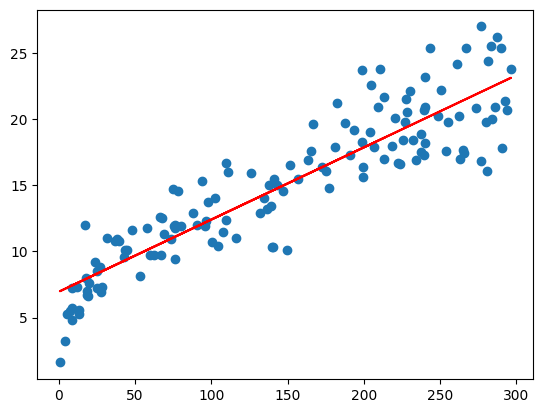

In [22]:
plt.scatter(X_train, y_train)
plt.plot(X_train, (w1 * X_train) + b, 'r')
plt.show()

### Model Evaluation

In [23]:
predictions = model.predict(X_test.reshape(-1,1))

In [24]:
mean_squared_error(y_test, predictions)

3.734113047761241

CHECKING THE R-SQUARED ON THE TEST SET

In [25]:
r_squared = r2_score(y_test, predictions)
r_squared

0.8149944458734971

### Visualizing the fit on the Test Set

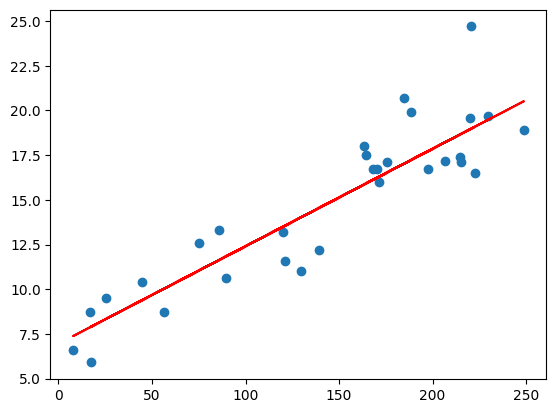

In [26]:
plt.scatter(X_test, y_test)
plt.plot(X_test, (w1 * X_test) +b, 'r')
plt.show()